# 정보량, 기댓값, 엔트로피

## 준비

* 파이썬 모듈 임포트
* Matplotlib 파라미터 설정

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 그래프 스타일 설정 (선택 사항)
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정 (Windows, Mac, Linux 환경에 맞게 주석 해제 후 사용)
# Windows
# plt.rcParams['font.family'] = 'Malgun Gothic'
# Mac
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux (나눔고딕 설치 필요)
plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

## 특정 사건의 정보량(Information Content)

정보량은 특정 사건 $x$가 발생하였을 때 해당 사건을 지칭하기 위해 필요로 하는 비트 수로 정의할 수 있습니다.

$$
\begin{equation}
I(x) = -log_2{P(x)}
\end{equation}
$$

예시:

* 동전 던지기에서 발생할 수 있는 사건은 다음 두 가지이며 각각의 사건을 구분하여 지칭하기 위해서는 1 비트가 필요합니다.
    * 앞면
    * 뒷면
* 다음 네 가지 색깔의 공이 들어 있는 바구니에서 한 개의 공을 집을 때 그 공의 색깔을 구분하여 지칭하기 위해서는 2 비트가 필요합니다.
    * 빨강
    * 노랑
    * 파랑
    * 보라

비트 수 이외에 다음 두 가지를 정보량의 단위로 사용하기도 합니다.

* 냇(nats): 자연 상수(e)를 로그의 밑으로 사용
* 하틀리(hartleys) 또는 딧(dits): 10을 로그의 밑으로 사용

다음은 사건 발생 확률에 따른 정보량을 계산하고 그래프로 표시하는 코드입니다.

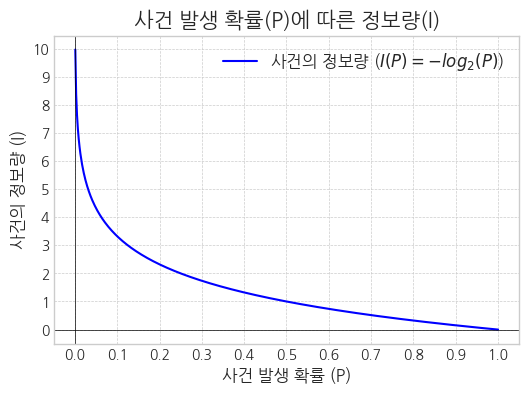

In [2]:
def plot_information_content():
    # x 축 데이터: 확률 (0에 매우 가까운 값부터 1까지)
    # log2(0)은 정의되지 않으므로, 0을 제외한 작은 양수부터 시작합코
    probabilities = np.linspace(0.001, 1, 500)
    
    # 정보량 -log2(P)
    information_content = -np.log2(probabilities)
    
    plt.figure(figsize=(6, 4))
    plt.plot(probabilities, information_content, label='사건의 정보량 ($I(P) = -log_2(P)$)', color='blue')
    
    plt.title('사건 발생 확률(P)에 따른 정보량(I)', fontsize=15)
    plt.xlabel('사건 발생 확률 (P)', fontsize=12)
    plt.ylabel('사건의 정보량 (I)', fontsize=12)
    
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, np.ceil(max(information_content)) +1 , 1)) # y축 눈금을 정수로, 최대값보다 약간 크게 설정
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    
    # x=0, y=0 선 강조 (선택 사항)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    plt.show()

plot_information_content()

## 정보원으로부터 얻을 수 있는 정보량의 기댓값

특정 사건 $x$의 발생 확률이 달라질 때 해당 사건이 정보원으로부터 얻을 수 있는 정보량의 기댓값에 기여하는 정도를 계산하여 그래프로 표시합니다.

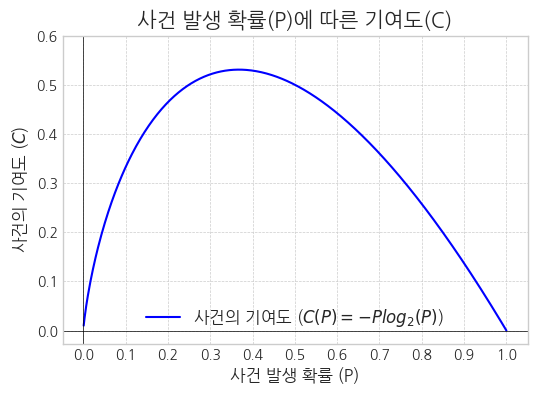

In [3]:
def plot_contribution():
    # x 축 데이터: 확률 (0에 매우 가까운 값부터 1까지)
    # log2(0)은 정의되지 않으므로, 0을 제외한 작은 양수부터 시작합니다.
    probabilities = np.linspace(0.001, 1, 500)
    
    # 정보량 -log2(P)
    information_content = -np.log2(probabilities)
    #information_content = -np.log(probabilities)
    #information_content = -np.log10(probabilities)

    # y 축 데이터: 정보량의 기댓값에 기여하는 정도
    contribution = probabilities * information_content
    
    plt.figure(figsize=(6, 4))
    plt.plot(probabilities, contribution, label='사건의 기여도 ($C(P) = -Plog_2(P)$)', color='blue')
    
    plt.title('사건 발생 확률(P)에 따른 기여도(C)', fontsize=15)
    plt.xlabel('사건 발생 확률 (P)', fontsize=12)
    plt.ylabel('사건의 기여도 ($C$)', fontsize=12)
    
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 0.7 , 0.1)) # y축 눈금을 정수로, 최대값보다 약간 크게 설정
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    
    # x=0, y=0 선 강조 (선택 사항)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    plt.show()

plot_contribution()

정보원으로부터 얻을 수 있는 정보량에 대한 기댓값은 각 사건 $x$의 정보량 $I(x)$에 해당 사건이 발생할 확률 $P(x)$을 곱한 값을 모두 더하여 계산합니다.

$X$가 이산 확률 변수라면 정보량의 기댓값은 다음과 같이 정의됩니다.

$$
E[I(X)] = \sum_i{P(x_i)I(x_i)} = -\sum_i P(x_i) log_2{P(x_i)}
$$

## 정보원의 엔트로피(Entropy)

엔트로피는 정보량의 기댓값을 지칭하는 또 하나의 이름입니다.

$$
H(X) = E[I(X)]
$$

다음은 동전 앞면 발생 확률이 바뀜에 따라 정보원의 엔트로피가 어떻게 변하는지 계산하고 그래프로 표시하는 코드입니다.

* $P$: 동전 앞면 발생 확률
* $Q$: 동전 뒷면 발생 확률 ($1-P$)

C:\Users\trvoi\AppData\Local\Temp\ipykernel_12780\3850943853.py:12: RuntimeWarning: divide by zero encountered in log2
  information_content_tail = -np.log2(probabilities_tail)
C:\Users\trvoi\AppData\Local\Temp\ipykernel_12780\3850943853.py:17: RuntimeWarning: invalid value encountered in multiply
  contribution_tail = probabilities_tail * information_content_tail


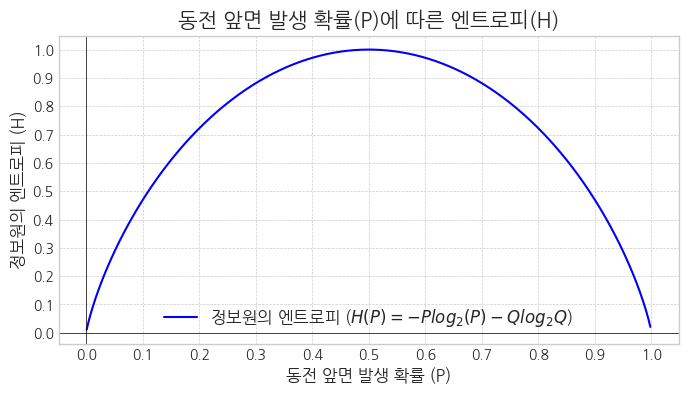

In [4]:
def plot_entropies():
    # x 축 데이터: 동전 앞면 발생 확률 (0에 매우 가까운 값부터 1까지)
    # log2(0)은 정의되지 않으므로, 0을 제외한 작은 양수부터 시작
    probabilities_head = np.linspace(0.001, 1, 500)

    # 동전 뒷면 발생 확률
    probabilities_tail = 1 - probabilities_head
    
    # 동전 앞면 발생 확률에 따른 정보량 -log2(P)
    information_content_head = -np.log2(probabilities_head)
    # 동전 뒷면 발생 확률에 따른 정보량 -log2(1-P)
    information_content_tail = -np.log2(probabilities_tail)
    
    # 동전 앞면 발생 확률(P)에 따른 엔트로피 기여도
    contribution_head = probabilities_head * information_content_head
    # 동전 뒷면 발생 확률(1-P)에 따른 엔트로피 기여도
    contribution_tail = probabilities_tail * information_content_tail
    
    # y 축 데이터: 동전 앞면 발생 확률에 따른 엔트로피
    entropies = contribution_head + contribution_tail
    
    plt.figure(figsize=(8, 4))
    plt.plot(probabilities_head, entropies, label='정보원의 엔트로피 ($H(P) = - Plog_2(P) - Qlog_2Q$)', color='blue')
    
    plt.title('동전 앞면 발생 확률(P)에 따른 엔트로피(H)', fontsize=15)
    plt.xlabel('동전 앞면 발생 확률 (P)', fontsize=12)
    plt.ylabel('정보원의 엔트로피 (H)', fontsize=12)
    
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1 , 0.1)) # y축 눈금을 정수로, 최대값보다 약간 크게 설정
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12)
    
    # x=0, y=0 선 강조 (선택 사항)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    
    plt.show()

plot_entropies()

동전 앞면 발생 확률($P$)이 0.5일 때 결과를 예측하는 것이 가장 어렵고 이 때의 엔트로피도 가장 높습니다.